In [1]:
import os
import pandas as pd
import random
import shutil
import numpy as np

def num_files(data_path):
    df = []
    
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            df.append((class_name, num_files))

    return pd.DataFrame(df, columns=['Class', 'Num Files'])

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils

def train_participant(df, random_state, cm, print_metrics, print_vol_labels):
    x = df.drop(columns=['volume', 'substance'])
    y = df[['substance', 'volume']]
    
    acc, label_acc = models.train_multioutput_models(x, y, random_state, cm, print_metrics)

    if print_vol_labels:
        volume_labels = np.unique(y['volume'])
        df_volume_labels = pd.DataFrame(volume_labels, columns=['volume'])
        print(df_volume_labels)
        
    return acc, label_acc

In [3]:
exclude = ['oral prep 0', 'apple 20', 'yogurt 20', 'chewing 0', 'grape 5', 'popcorn 1', 'redu oral prep 0', 'carrot 5']

In [4]:
chloe_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\chloe\extracted signals'   
chloe_df, chloe_map = feature_extraction.make_df(chloe_path, exclude)
print(chloe_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [5]:
chloe_acc, chloe_label_acc = train_participant(chloe_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 95.8333
Per-Label Accuracies: [97.91666667 97.91666667]
----------------------------
KNN
Exact Match Accuracy: 93.7500
Per-Label Accuracies: [ 93.75 100.  ]
----------------------------
Decision Tree
Exact Match Accuracy: 91.6667
Per-Label Accuracies: [93.75       97.91666667]
----------------------------
Naive Bayes
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [93.75       79.16666667]
----------------------------
Logistic Regression
Exact Match Accuracy: 97.9167
Per-Label Accuracies: [ 97.91666667 100.        ]
----------------------------
Gradient Boost
Exact Match Accuracy: 93.7500
Per-Label Accuracies: [93.75       97.91666667]
----------------------------
  volume
0      0
1     10
2     20


In [6]:
libing_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\libing\extracted signals'
libing_df, libing_map = feature_extraction.make_df(libing_path, exclude)
print(libing_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [7]:
libing_acc, libing_label_acc = train_participant(libing_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [62.5 87.5]
----------------------------
Decision Tree
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [37.5 87.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [87.5 87.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
Gradient Boost
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [62.5 75. ]
----------------------------
  volume
0      0
1     10
2     20


In [8]:
wenjian_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\wenjian\extracted signals'
wenjian_df, wenjian_map = feature_extraction.make_df(wenjian_path, exclude)
print(wenjian_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [9]:
wenjian_acc, wenjian_label_acc = train_participant(wenjian_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [75.  62.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [87.5 62.5]
----------------------------
Decision Tree
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [50. 50.]
----------------------------
Naive Bayes
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75.  62.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75. 75.]
----------------------------
Gradient Boost
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [37.5 62.5]
----------------------------
  volume
0      0
1     10
2     20


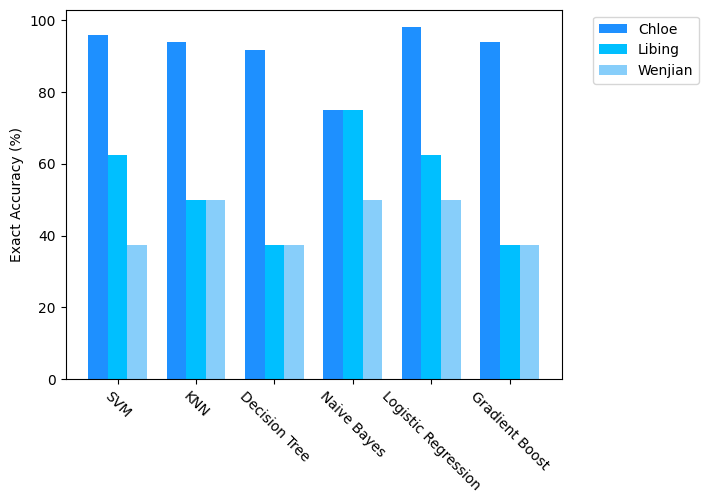

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

model_names = [name for name, _ in single_models]

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.25  # width of each bar

# Plot bars side by side
plt.bar(x - width, chloe_acc, width, label='Chloe', color='dodgerblue')
plt.bar(x, libing_acc, width, label='Libing', color='deepskyblue')
plt.bar(x + width, wenjian_acc, width, label='Wenjian', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [11]:
chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\1458217129.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)
C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\1458217129.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)


In [12]:
chloe_acc_lim, chloe_label_acc_lim = train_participant(chloe_df_limited, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [100.   87.5]
----------------------------
KNN
Exact Match Accuracy: 100.0000
Per-Label Accuracies: [100. 100.]
----------------------------
Decision Tree
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75. 75.]
----------------------------
Naive Bayes
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [87.5 87.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 100.0000
Per-Label Accuracies: [100. 100.]
----------------------------
Gradient Boost
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [100.   87.5]
----------------------------
  volume
0      0
1     10
2     20


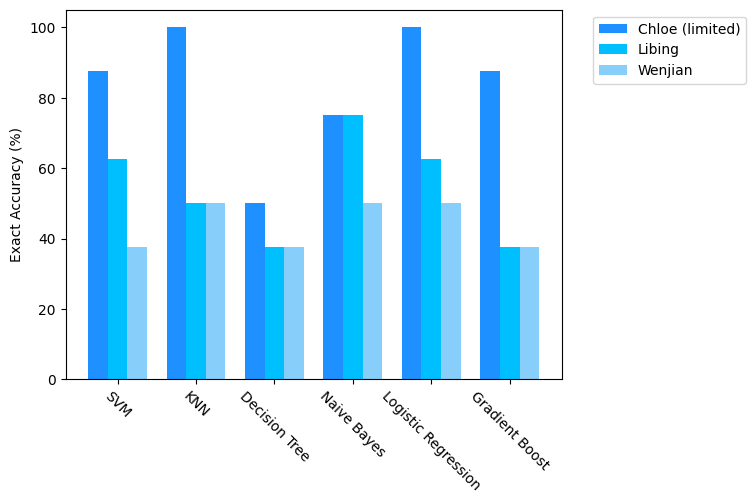

In [13]:
# Plot bars side by side
plt.bar(x - width, chloe_acc_lim, width, label='Chloe (limited)', color='dodgerblue')
plt.bar(x, libing_acc, width, label='Libing', color='deepskyblue')
plt.bar(x + width, wenjian_acc, width, label='Wenjian', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [14]:
all_participants = pd.concat([chloe_df_limited, libing_df, wenjian_df], axis=0)
all_participants

substance volume         1                                               \
                          min      max        mav        rms    wavelength   
0          0     10 -113.9200  86.1073   9.896790  16.791919   8262.519721   
1          0     10  -93.2483  78.9682  10.495512  16.181334   8649.753681   
2          0     10  -89.8215  73.5244  10.123081  15.526914   8511.370464   
3          0     10  -88.6977  81.8359  12.612036  19.088507  10709.496207   
4          0     10 -109.2850  93.4031  11.028039  18.431980   9402.811823   
..       ...    ...       ...      ...        ...        ...           ...   
35         5     10  -63.9541  72.2357  13.076436  17.415477  15498.935331   
36         5     10  -86.1039  67.9453  12.480544  16.866867  15387.195046   
37         5     10  -66.9294  66.4570  13.246470  17.656275  15506.199016   
38         5     10  -81.6146  83.1651  13.054595  17.908864  14503.207393   
39         5     10  -97.7972  81.3140  13.341329  18.231295  15144.190226   

                                                 ...        21     22         \
           var abs_diffs_signal shannon_entropy  ...      iemg    min    max   
0   281.968302      8262.519721        2.937729  ...   4700640 -12740  12040   
1   261.835507      8649.753681        3.306812  ...   4258940 -17080   8680   
2   241.085047      8511.370464        3.307889  ...   3186400 -15680  14560   
3   364.364970     10709.496207        3.557469  ...   3223500 -10080   7980   
4   339.733850      9402.811823        3.053208  ...   5536020 -14280  11900   
..         ...              ...             ...  ...       ...    ...    ...   
35  303.298301     15498.935331        3.915314  ...   9545620 -13020  31500   
36  284.490971     15387.195046        3.664392  ...  10166380 -20020  33180   
37  311.742098     15506.199016        3.977486  ...  10830820 -19180  23940   
38  320.724537     14503.207393        3.660768  ...  10317020 -19740  26040   
39  332.379973     15144.190226        3.560670  ...  10367140 -21560  21000   

                                                                    \
        mav          rms wavelength           var abs_diffs_signal   
0   4038.86  4996.715521     449540  2.476357e+07           449540   
1   4471.32  5655.941089     390040  3.167982e+07           390040   
2   3322.06  4634.416598     426580  2.147730e+07           426580   
3   2627.66  3369.637429     401240  1.130283e+07           401240   
4   4063.50  5150.270634     332360  2.640869e+07           332360   
..      ...          ...        ...           ...              ...   
35  4806.48  7420.795052     283080  5.506818e+07           283080   
36  5386.22  8316.637518     358820  6.905886e+07           358820   
37  5178.88  7074.234771     336140  4.974790e+07           336140   
38  4370.38  6999.656992     301420  4.828889e+07           301420   
39  4276.72  6234.512972     347060  3.885161e+07           347060   

                             
   shannon_entropy     iemg  
0         4.537548  4038860  
1         4.467487  4471320  
2         4.040291  3322060  
3         4.433945  2627660  
4         4.481689  4063500  
..             ...      ...  
35        3.858004  4806480  
36        3.779000  5386220  
37        4.191279  5178880  
38        3.694230  4370380  
39        3.914766  4276720  

[120 rows x 200 columns]

In [15]:
x = all_participants.drop(columns=['volume', 'substance'])
y = all_participants[['substance', 'volume']]
    
acc, label_acc = models.train_multioutput_models(x, y, 42, False, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_35208\114170057.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = all_participants.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 41.6667
Per-Label Accuracies: [75.         58.33333333]
----------------------------
KNN
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.         79.16666667]
----------------------------
Decision Tree
Exact Match Accuracy: 29.1667
Per-Label Accuracies: [50.  62.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 16.6667
Per-Label Accuracies: [41.66666667 41.66666667]
----------------------------
Logistic Regression
Exact Match Accuracy: 41.6667
Per-Label Accuracies: [66.66666667 62.5       ]
----------------------------
Gradient Boost
Exact Match Accuracy: 45.8333
Per-Label Accuracies: [66.66666667 66.66666667]
----------------------------


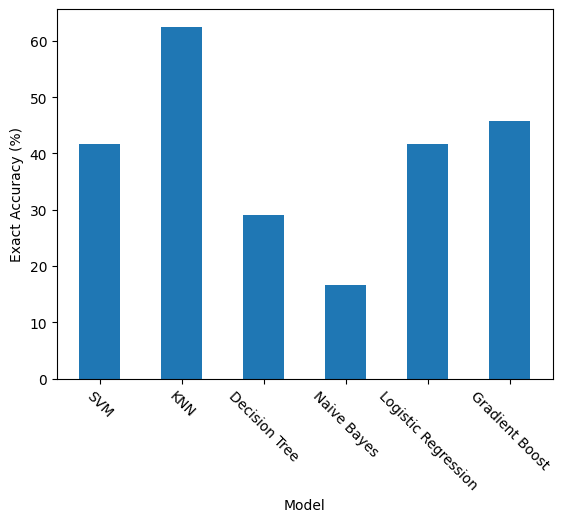

In [16]:
from src import results

results.plot_accuracy(acc)

In [17]:
chloe_df_limited.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\chloe_limited.csv', index=False)
libing_df.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\libing.csv', index=False)
wenjian_df.to_csv(r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\notebooks\participant features\wenjian.csv', index=False)